# CHALLENGE - HR Analytics – Analytics Vidhya

## Caso:  HR - Analytics

Su cliente es una multinacional grande y tiene 9 verticales amplios en toda la organización. Uno de los problemas que enfrenta su
cliente es identificar a las personas adecuadas para la promoción (solo para puestos de gerente e inferiores) y prepararlos a
tiempo. Actualmente el proceso que están siguiendo es:
Primero identifican un conjunto de empleados basados ​en recomendaciones/desempeño pasado
Los empleados seleccionados pasan por el programa de capacitación y evaluación por separado para cada vertical. Estos programas
se basan en la habilidad requerida de cada vertical.
Al final del programa, en función de varios factores, como el rendimiento de la capacitación, la finalización de KPI (solo se consideran
los empleados con KPI completados en más del 60 %), etc., el empleado obtiene un ascenso
Para el proceso mencionado anteriormente, las promociones finales solo se anuncian después de la evaluación y esto lleva a un
retraso en la transición a sus nuevos roles. Por lo tanto, la empresa necesita su ayuda para identificar a los candidatos elegibles en un
punto de control en particular para que puedan acelerar todo el ciclo de promoción

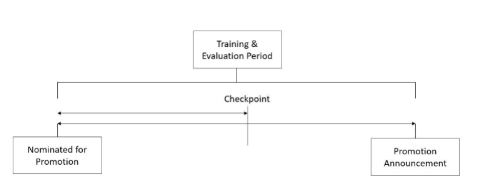

Han proporcionado múltiples atributos sobre el desempeño pasado y actual del empleado junto con la demografía. Ahora, la tarea es
predecir si un promotor potencial en el punto de control en el conjunto de prueba será promovido o no después del proceso de
evaluación.

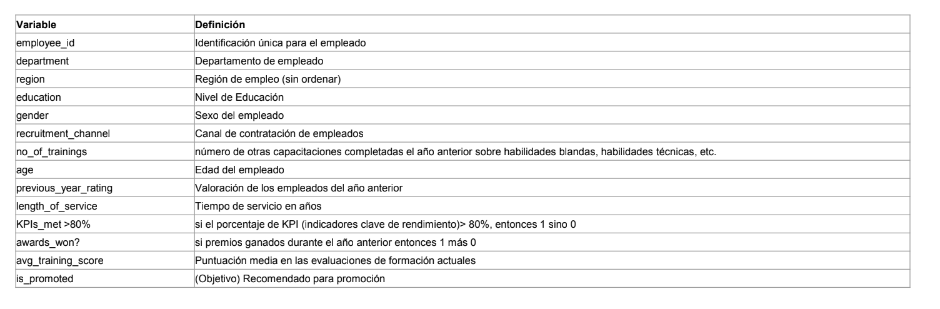

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
seed = 2023
target = 'is_promoted'
id_column = 'employee_id'

### Importamos la data

Comenzamos importando primero al train 

In [3]:
data_train = pd.read_csv('data/train.csv')
data = pd.read_csv('data/train.csv')

In [4]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


##  Matriz de Correlacion

Antes de hacer la matriz, limpiamos algunas variables

In [5]:
clear = ['employee_id', 'region']
data = data.drop(clear, axis = 1)

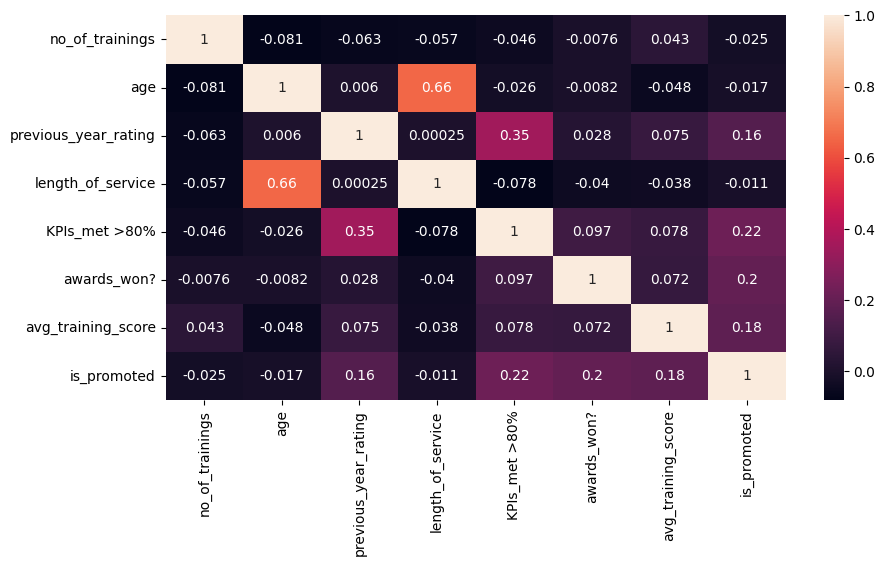

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot = True)
plt.show()

## DATA ORIGINAL

In [7]:
data_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [8]:
data_train[target].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [9]:
data_target_train = data_train[target]
data_target_train.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [10]:
data_train = data_train.drop(id_column, axis = 1)
data_train = data_train.drop(target, axis = 1)

In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 5.0+ MB


In [12]:
data_train.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000


In [13]:
data_train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


Descartamos las variables departament y region ya que poseen demasiadas categorias

In [14]:
# data_train = data_train.drop('department', axis = 1)
data_train = data_train.drop('region', axis = 1)

### Revisando si hay valores nulos 

In [15]:
data_train.isnull().sum()

department                 0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

### Imputacion de variables 

In [16]:
data_train_cat = data_train.select_dtypes('object')
data_train_num = data_train.select_dtypes('number')

Variables Categoricas

In [17]:
from sklearn.impute import SimpleImputer
imputer_cat = SimpleImputer(strategy = 'most_frequent')
imputer_cat.fit(data_train_cat)
data_train_cat_imputed = pd.DataFrame(imputer_cat.transform(data_train_cat), columns = data_train_cat.columns)
data_train_cat_imputed.head()

,department,education,gender,recruitment_channel
0,Sales & Marketing,Master's & above,f,sourcing
1,Operations,Bachelor's,m,other
2,Sales & Marketing,Bachelor's,m,sourcing
3,Sales & Marketing,Bachelor's,m,other
4,Technology,Bachelor's,m,other


In [18]:
imputer_cat.statistics_

array(['Sales & Marketing', "Bachelor's", 'm', 'other'], dtype=object)

Validamos los valores nulos

In [19]:
data_train_cat.isnull().sum()

department                0
education              2409
gender                    0
recruitment_channel       0
dtype: int64

In [20]:
data_train_cat_imputed.isnull().sum()

department             0
education              0
gender                 0
recruitment_channel    0
dtype: int64

Variables Numericas

In [21]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors = 3)

In [22]:
knn.fit_transform(data_train_num)

array([[ 1., 35.,  5., ...,  1.,  0., 49.],
       [ 1., 30.,  5., ...,  0.,  0., 60.],
       [ 1., 34.,  3., ...,  0.,  0., 50.],
       ...,
       [ 1., 27.,  5., ...,  1.,  0., 79.],
       [ 1., 29.,  1., ...,  0.,  0., 45.],
       [ 1., 27.,  1., ...,  0.,  0., 49.]])

In [23]:
data_train_num_imputed2 = pd.DataFrame(data = knn.fit_transform(data_train_num), columns = data_train_num.columns)

Validamos los valores nulos 

In [24]:
data_train_num.isnull().sum()

no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [25]:
data_train_num_imputed2.isnull().sum()

no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

## Enconding variables categoricas

In [26]:
data_train_cat_imputed.describe()

,department,education,gender,recruitment_channel
count,54808,54808,54808,54808
unique,9,3,2,3
top,Sales & Marketing,Bachelor's,m,other
freq,16840,39078,38496,30446


In [27]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [28]:
ohe.fit(data_train_cat_imputed)

OneHotEncoder()

In [29]:
ohe.transform(data_train_cat_imputed).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [30]:
columnas = list(ohe.categories_[0])+list(ohe.categories_[1])+list(ohe.categories_[2]) + list(ohe.categories_[3])

In [31]:
data_train_cat_dummies2 = pd.DataFrame(data = ohe.transform(data_train_cat_imputed).toarray(), columns = columnas)
data_train_cat_dummies2.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Bachelor's,Below Secondary,Master's & above,f,m,other,referred,sourcing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## Tratamiento de Valores Extremos 

In [32]:
data_train_num_imputed2.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1.0,35.0,5.0,8.0,1.0,0.0,49.0
1,1.0,30.0,5.0,4.0,0.0,0.0,60.0
2,1.0,34.0,3.0,7.0,0.0,0.0,50.0
3,2.0,39.0,1.0,10.0,0.0,0.0,50.0
4,1.0,45.0,3.0,2.0,0.0,0.0,73.0


In [33]:
data_train_num_imputed2.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329429,5.865512,0.351974,0.023172,63.386750
std,0.609264,7.660169,1.230352,4.265094,0.477590,0.150450,13.371559
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000


In [34]:
data_train_num_imputed2.describe(percentiles = [0.50, 0.75, 0.90, 0.95, 0.99])

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329429,5.865512,0.351974,0.023172,63.386750
std,0.609264,7.660169,1.230352,4.265094,0.477590,0.150450,13.371559
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
90%,2.000000,46.000000,5.000000,11.000000,1.000000,0.000000,83.000000
95%,2.000000,51.000000,5.000000,15.000000,1.000000,0.000000,86.000000
99%,4.000000,58.000000,5.000000,20.000000,1.000000,1.000000,91.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000


## Consolidacion

In [35]:
data_train_cat_dummies2.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Bachelor's,Below Secondary,Master's & above,f,m,other,referred,sourcing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [36]:
data_train_num_imputed2.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1.0,35.0,5.0,8.0,1.0,0.0,49.0
1,1.0,30.0,5.0,4.0,0.0,0.0,60.0
2,1.0,34.0,3.0,7.0,0.0,0.0,50.0
3,2.0,39.0,1.0,10.0,0.0,0.0,50.0
4,1.0,45.0,3.0,2.0,0.0,0.0,73.0


In [37]:
data_train_total = pd.concat([data_train_cat_dummies2, data_train_num_imputed2], axis = 1)
data_train_total

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Bachelor's,...,other,referred,sourcing,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,35.0,5.0,8.0,1.0,0.0,49.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,30.0,5.0,4.0,0.0,0.0,60.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,34.0,3.0,7.0,0.0,0.0,50.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,2.0,39.0,1.0,10.0,0.0,0.0,50.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,45.0,3.0,2.0,0.0,0.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,48.0,3.0,17.0,0.0,0.0,78.0
54804,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,37.0,2.0,6.0,0.0,0.0,56.0
54805,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,27.0,5.0,3.0,1.0,0.0,79.0
54806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,29.0,1.0,2.0,0.0,0.0,45.0


In [38]:
data_train_total.isnull().sum()

Analytics               0
Finance                 0
HR                      0
Legal                   0
Operations              0
Procurement             0
R&D                     0
Sales & Marketing       0
Technology              0
Bachelor's              0
Below Secondary         0
Master's & above        0
f                       0
m                       0
other                   0
referred                0
sourcing                0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

### Estandarización

In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

In [40]:
data_scaled = scaler.fit_transform(data_train_total)

In [41]:
columnas = data_train_total.columns

In [42]:
data_train_scaled = pd.DataFrame(data = data_scaled, columns = columnas)
data_train_scaled[target] = data_target_train.values
data_train_scaled.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Bachelor's,...,referred,sourcing,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.000000,0.350,0.5,0.166667,0.0,0.0,0.183333,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.111111,0.475,0.0,0.250000,0.0,0.0,0.183333,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.000000,0.625,0.5,0.027778,0.0,0.0,0.566667,0


## Repetimos para el conjunto de validación

In [43]:
data_test = pd.read_csv('data/test.csv')
data_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [44]:
employee_id = data_test[id_column]
data_test = data_test.drop(id_column, axis = 1)
# data_test = data_test.drop('department', axis = 1)
data_test = data_test.drop('region', axis = 1)

In [45]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            23490 non-null  object 
 1   education             22456 non-null  object 
 2   gender                23490 non-null  object 
 3   recruitment_channel   23490 non-null  object 
 4   no_of_trainings       23490 non-null  int64  
 5   age                   23490 non-null  int64  
 6   previous_year_rating  21678 non-null  float64
 7   length_of_service     23490 non-null  int64  
 8   KPIs_met >80%         23490 non-null  int64  
 9   awards_won?           23490 non-null  int64  
 10  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 2.0+ MB


In [46]:
data_test_cat = data_test.select_dtypes('object')
data_test_num = data_test.select_dtypes('number')

## Imputacion de Valores Nulos 

### Numericas

In [47]:
knn.fit_transform(data_test_num)

array([[ 1.        , 24.        ,  4.        , ...,  1.        ,
         0.        , 77.        ],
       [ 1.        , 31.        ,  3.        , ...,  0.        ,
         0.        , 51.        ],
       [ 1.        , 31.        ,  1.        , ...,  0.        ,
         0.        , 47.        ],
       ...,
       [ 1.        , 26.        ,  4.        , ...,  0.        ,
         0.        , 50.        ],
       [ 3.        , 27.        ,  2.33333333, ...,  0.        ,
         0.        , 70.        ],
       [ 3.        , 40.        ,  5.        , ...,  1.        ,
         0.        , 89.        ]])

In [48]:
data_test_num_imputed = pd.DataFrame(data = knn.fit_transform(data_test_num), columns = data_test_num.columns)

In [49]:
data_test_num_imputed.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1.0,24.0,4.0,1.0,1.0,0.0,77.0
1,1.0,31.0,3.0,5.0,0.0,0.0,51.0
2,1.0,31.0,1.0,4.0,0.0,0.0,47.0
3,3.0,31.0,2.0,9.0,0.0,0.0,65.0
4,1.0,30.0,4.0,7.0,0.0,0.0,61.0


In [50]:
data_test_num_imputed.isnull().sum()

no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

### Categoricas

In [51]:
data_test_cat_imputed = pd.DataFrame(imputer_cat.transform(data_test_cat), columns = data_test_cat.columns)
data_test_cat_imputed.head()

,department,education,gender,recruitment_channel
0,Technology,Bachelor's,m,sourcing
1,HR,Bachelor's,f,other
2,Sales & Marketing,Bachelor's,m,other
3,Procurement,Bachelor's,f,other
4,Finance,Bachelor's,m,sourcing


In [52]:
data_test_cat_imputed.isnull().sum()

department             0
education              0
gender                 0
recruitment_channel    0
dtype: int64

### Encoding

In [55]:
ohe.fit(data_test_cat_imputed)
columnas = list(ohe.categories_[0])+list(ohe.categories_[1])+list(ohe.categories_[2]) + list(ohe.categories_[3])
ohe.transform(data_test_cat_imputed).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [56]:
data_test_cat_dummies = pd.DataFrame(data = ohe.transform(data_test_cat_imputed).toarray(), columns = columnas)

In [57]:
data_test_total = pd.concat([data_test_cat_dummies, data_test_num_imputed], axis = 1)

In [58]:
data_test_scaled = pd.DataFrame(data = scaler.fit_transform(data_test_total), columns = data_test_total.columns)
data_test_scaled.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Bachelor's,...,other,referred,sourcing,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.00,0.100,0.75,0.000000,1.0,0.0,0.633333
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.00,0.275,0.50,0.121212,0.0,0.0,0.200000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.00,0.275,0.00,0.090909,0.0,0.0,0.133333
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.25,0.275,0.25,0.242424,0.0,0.0,0.433333
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.00,0.250,0.75,0.181818,0.0,0.0,0.366667


In [59]:
data_train_scaled.shape

(54808, 25)

In [60]:
data_test_scaled.shape

(23490, 24)

In [61]:
x = data_train_scaled.drop(target, axis = 1)
y = data_train_scaled[target]

### Dividimos la data

In [62]:
from sklearn.model_selection import train_test_split

Usamos la division train/test de 80/20

In [63]:
X_train, X_test, y_train,y_test = train_test_split(x,y, test_size = 0.2, stratify = y, random_state = seed) 


------------------------------------------------------------------------------------------------------

## Regresion Logistica Binaria

In [64]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_lr = lr.fit(X_train, y_train)

In [65]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [66]:
y_proba_test = lr.predict_proba(X_test)[:,1]

Matriz de Confusion para el conjunto del test

In [67]:
from sklearn import metrics as metrics

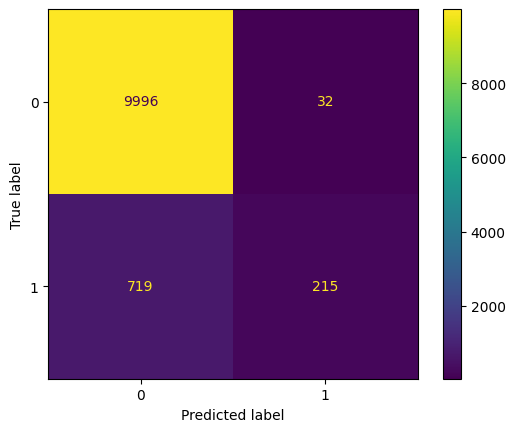

In [68]:
cm = metrics.confusion_matrix(y_test, y_pred_test, labels=lr.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr.classes_)
disp.plot()
plt.show()

In [69]:
def metricas_confusion(y_test,y_pred_test):
    print("Matriz confusion: Test")
    cm_test = metrics.confusion_matrix(y_test,y_pred_test)
    print(cm_test)
    
    print("Accuracy: Test")
    accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
    print(accuracy_test)
    
    print("Precision: Test")
    precision_test=metrics.precision_score(y_test,y_pred_test)
    print(precision_test)
    
    print("Recall: Test")
    recall_test=metrics.recall_score(y_test,y_pred_test)
    print(recall_test)

In [70]:
metricas_confusion(y_test,y_pred_test)

Matriz confusion: Test
[[9996   32]
 [ 719  215]]
Accuracy: Test
0.931490603904397
Precision: Test
0.8704453441295547
Recall: Test
0.23019271948608136


In [71]:
from sklearn.metrics import classification_report
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10028
           1       0.87      0.23      0.36       934

    accuracy                           0.93     10962
   macro avg       0.90      0.61      0.66     10962
weighted avg       0.93      0.93      0.91     10962



In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(y, y_proba, label=''):
    auc_roc = roc_auc_score(y, y_proba)
    fpr, tpr, thresholds = roc_curve(y, y_proba)

    plt.figure(figsize=(8, 6))
    plt.rcParams.update({'font.size': 12})
    plt.plot(fpr, fpr, c='red')
    plt.plot(fpr, tpr, label=(f"Curva ROC {label} (AUC = {auc_roc:.4f})"))
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"Curva ROC {label}")
    plt.legend(loc=4, numpoints=1)

    auc_train = roc_auc_score(y_test, y_proba_test)
    print(f"AUC Train: {auc_train:.4f}")

In [73]:
roc_auc_score(y_test, y_proba_test)

0.8669006759659678

AUC Train: 0.8669


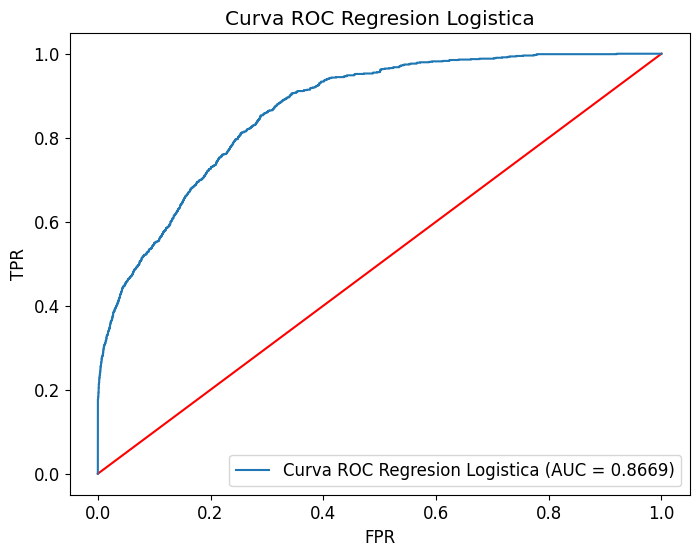

In [74]:
plot_roc_curve(y_test, y_proba_test, 'Regresion Logistica')

### Probando con Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [76]:
clf = DecisionTreeClassifier(random_state = 2)
model_dt = clf.fit(X_train, y_train)

In [77]:
pred = model_dt.predict(X_test)

In [78]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10028
           1       0.40      0.43      0.42       934

    accuracy                           0.90     10962
   macro avg       0.67      0.69      0.68     10962
weighted avg       0.90      0.90      0.90     10962



AUC Train: 0.6849


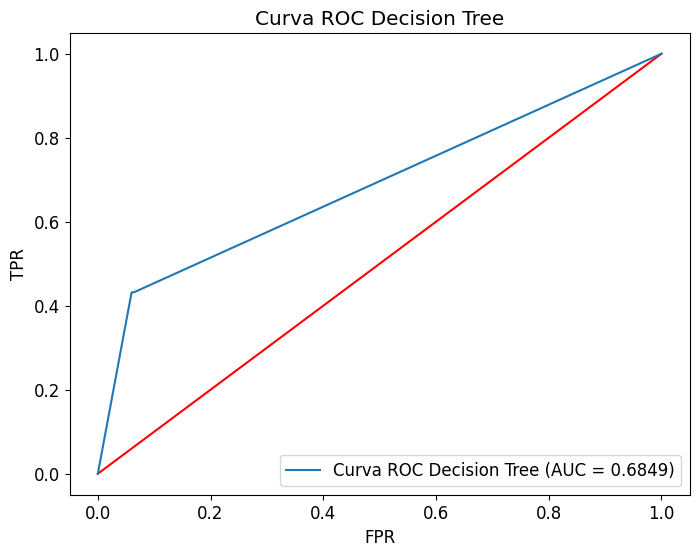

In [79]:
y_proba_test = model_dt.predict_proba(X_test)[:,1]
plot_roc_curve(y_test, y_proba_test, 'Decision Tree')

### Probando con random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rfc = RandomForestClassifier(max_depth = 25, random_state = 0)
model_rfc = rfc.fit(X_train, y_train)
pred_rfc = model_rfc.predict(X_test)

In [82]:
print(metrics.classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10028
           1       0.76      0.33      0.46       934

    accuracy                           0.93     10962
   macro avg       0.85      0.66      0.71     10962
weighted avg       0.92      0.93      0.92     10962



AUC Train: 0.8794


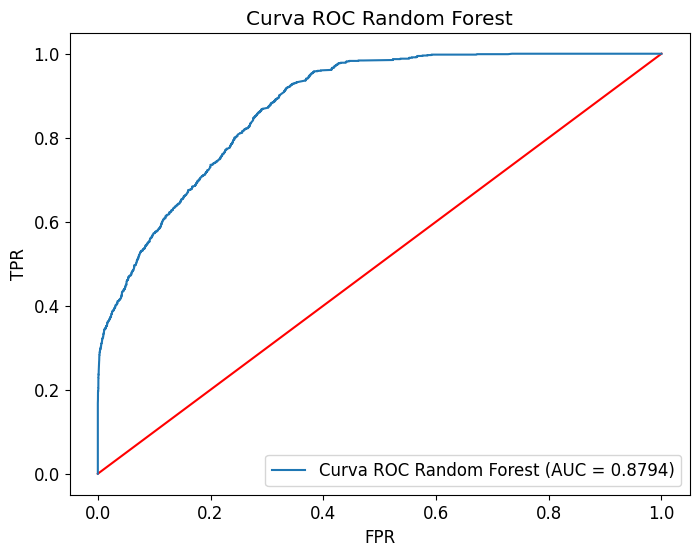

In [83]:
y_proba_test = model_rfc.predict_proba(X_test)[:,1]
plot_roc_curve(y_test, y_proba_test, 'Random Forest')

In [84]:
pred_final_svc = model_rfc.predict(data_test_scaled)

In [85]:
data_test_scaled.insert(0, id_column, employee_id)
data_test_scaled.insert(1, target, pred_final_svc)

In [86]:
data_test_scaled.head()

,employee_id,is_promoted,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,...,other,referred,sourcing,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.00,0.100,0.75,0.000000,1.0,0.0,0.633333
1,74430,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.00,0.275,0.50,0.121212,0.0,0.0,0.200000
2,72255,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.00,0.275,0.00,0.090909,0.0,0.0,0.133333
3,38562,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.25,0.275,0.25,0.242424,0.0,0.0,0.433333
4,64486,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.00,0.250,0.75,0.181818,0.0,0.0,0.366667


In [87]:
data_test_scaled[target].value_counts()

0    22658
1      832
Name: is_promoted, dtype: int64